In [608]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading Dataset

In [609]:
df = pd.read_csv('Train.csv')

In [610]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [611]:
# Statistical Information
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### we can see in above information, count of item_weight colimn is less than other column. For that we need preprocessing.

In [612]:
# Datatypes of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##### In above info, there are some object type column, Those are some categorical attribues which we need to preprocess seperately.

In [613]:
# check unique values in dataset.
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Pre-Processing the Dataset

##### There are two kind of preprocessing we have to do for this dataset. One is handling of missing values and another is Handling Categorical attribues

### 1. Handling Missing Values

In [614]:
# Check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### As per above information Item_Weight and Outlet_size,these two attribues has null values 
#### 1.1 Item_Weight

In [615]:
# Fill Missing Values - Caluclating mean of attribues to fill the null values
item_weight_mean = df.pivot_table(values="Item_Weight", index="Item_Identifier")
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [616]:
# Check the null values in attribue
miss_bool = df["Item_Weight"].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

##### If the answer is True, then it has null value
##### Now, lets fill the missing values

In [617]:
for i,item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

df['Item_Weight'].isnull().sum()

0

#### 1.2 Outlet_Size 

In [618]:
df['Outlet_Size'].head()

0    Medium
1    Medium
2    Medium
3       NaN
4      High
Name: Outlet_Size, dtype: object

In [619]:
# Fill Missing Values - Caluclating mode of attribues to fill the null values
outlet_size_mode = df.pivot_table(values="Outlet_Size", columns="Outlet_Type",aggfunc = (lambda x:x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [620]:
# Check the null values in attribue
miss_bool_outlet = df["Outlet_Size"].isnull()
miss_bool_outlet

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

##### If the answer is True, then it has null value
##### Now, lets fill the missing values

In [621]:
df.loc[miss_bool_outlet,'Outlet_Size'] = df.loc[miss_bool_outlet,'Outlet_Type'].apply(lambda x:outlet_size_mode[x])

df['Outlet_Type'].isnull().sum()

0

##### In Item Visibility column, there are some zero values, we can fill them with mean of the same attribue

In [622]:
sum(df['Item_Visibility']==0)

526

In [623]:
# Replace zero's with mean
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace = True)

In [624]:
sum(df['Item_Visibility']==0)

0

##### This is how we have handled all the missing values and zero values in dataset

### 2. Handling Categorical Data

In [625]:
# Check for categorical attribues
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)     

In [626]:
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

##### There are too many categories in Item_Identifier attributes, so lets make new attribue based on Item Identifier attribue

In [627]:
df['New_Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Identifier']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Identifier, Length: 8523, dtype: object

In [628]:
df['New_Item_Identifier'] = df['New_Item_Identifier'].replace({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
print(df['New_Item_Identifier'].value_counts())

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Identifier, dtype: int64


##### we dont need item_identifier now so lets remove them from cat_col list and from df.

In [629]:
cat_col.remove('Item_Identifier')
df = df.drop(columns=['Item_Identifier'])
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [630]:
# Print all Categorical Columns with thier count.
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print("\n")

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Identifier
OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Outlet_Size
Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64


Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Ti

### 2.1 Item_Fat_Content

In [631]:
print(df['Item_Fat_Content'].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


##### In above info, we can observ that Low Fat, LF, low fat should be in same category.
##### Similarly, Regular and reg should be in same category.

In [632]:
# Combining item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [633]:
print(df['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


### 2.2 Outlet_Type

In [634]:
print(df['Outlet_Type'].value_counts())

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


###### we can combine all supermarket types into one

In [635]:
df['Outlet_Type'] = df['Outlet_Type'].replace({'Supermarket Type1':'Supermarket','Supermarket Type2':'Supermarket','Supermarket Type3':'Supermarket'})

In [636]:
print(df['Outlet_Type'].value_counts())

Supermarket      7440
Grocery Store    1083
Name: Outlet_Type, dtype: int64


# Exploratory Data Analysis

##### First we will see Numerical attributes

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

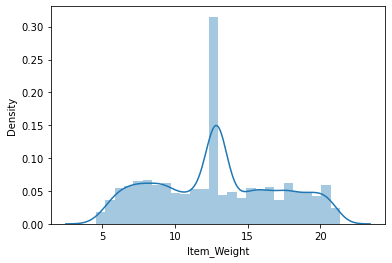

In [637]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

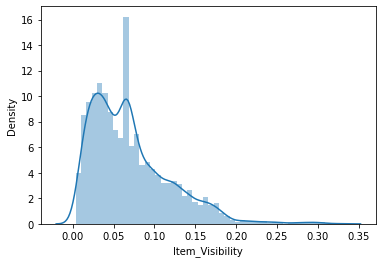

In [638]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

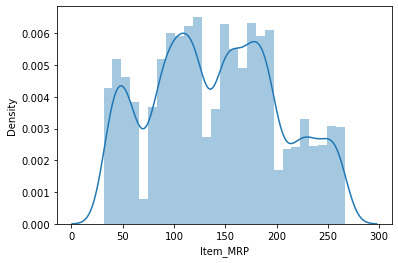

In [639]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

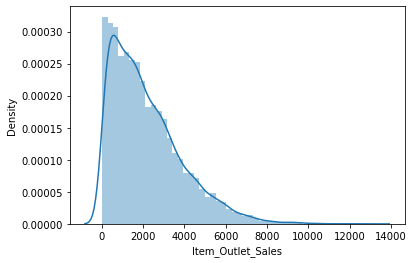

In [640]:
sns.distplot(df['Item_Outlet_Sales'])

##### In above plot, dataset is left squad , lets normalize this. We are using Log Transformation.

In [641]:
# Log Transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

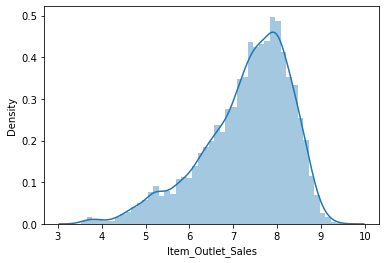

In [642]:
sns.distplot(df['Item_Outlet_Sales'])

##### Now, its look like normal distribution or uniform distribution

##### Now lets see Categorical attributes

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

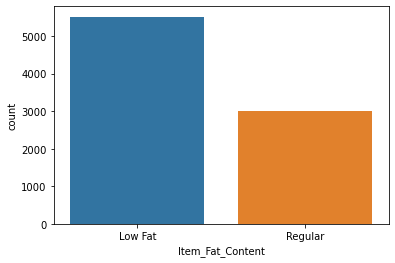

In [643]:
sns.countplot(df['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

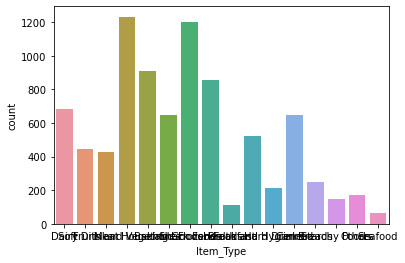

In [644]:
sns.countplot(df['Item_Type'])

##### There are too many categories, to see it properly we can use pyplot function from matplotlib library.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

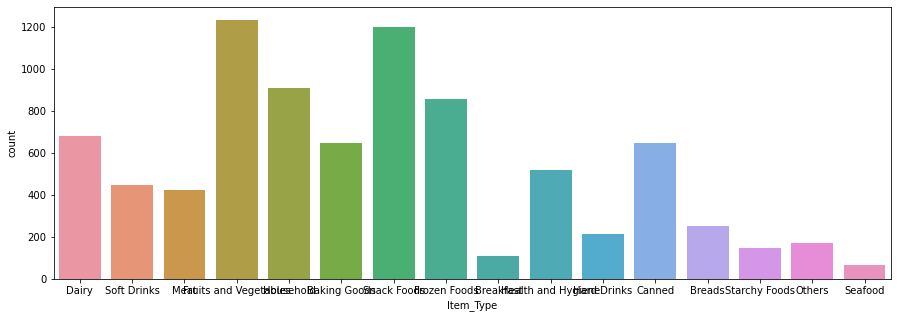

In [645]:
plt.figure(figsize=(15,5))
sns.countplot(df['Item_Type'])

##### Still not visible, lets display lables in vertical manner

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

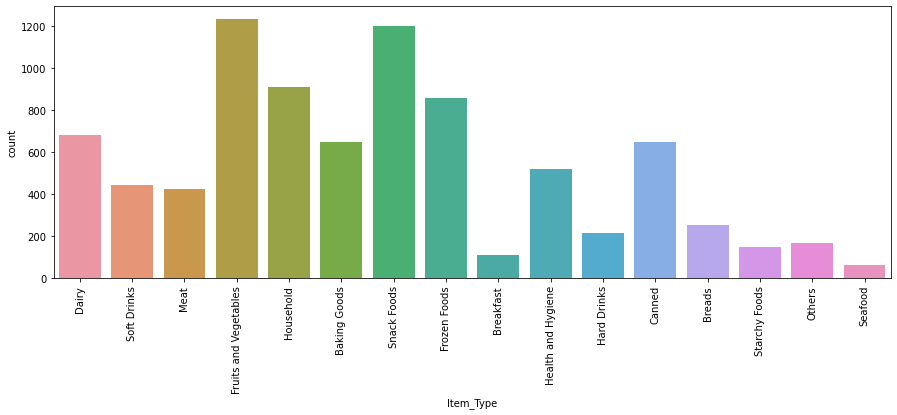

In [646]:
l =list(df['Item_Type'].unique())
plt.figure(figsize=(15,5))
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

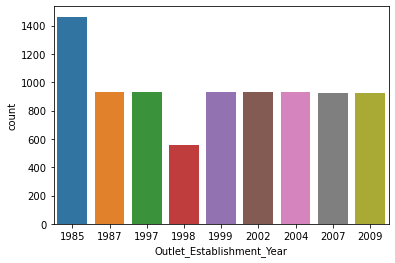

In [647]:
sns.countplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

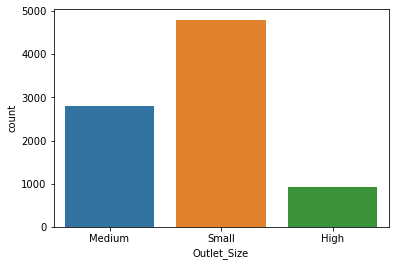

In [648]:
sns.countplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

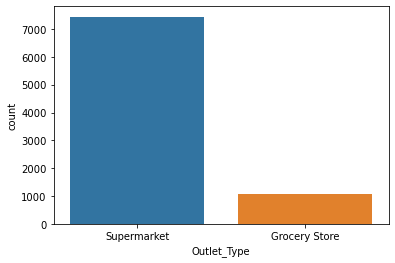

In [649]:
sns.countplot(df['Outlet_Type'])

# Coorelation Matrix

<AxesSubplot:>

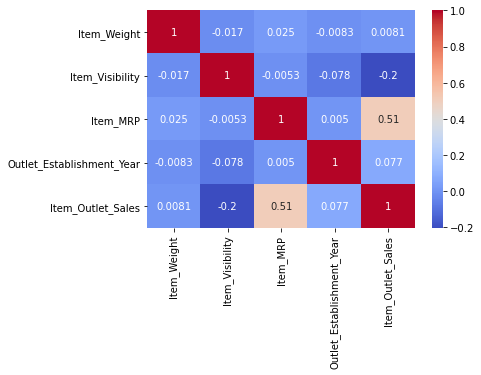

In [650]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

##### As per above info, to predict item_outlet_sales, most effective attribute is Item_MRP, This coorelation method doent consider categorical attribues

In [651]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket,8.225808,Food
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket,6.096776,Drinks
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket,7.648868,Food
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food
4,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket,6.903451,Non-Consumable


# Label Encoder

In [652]:
# Converting all categorical attribues into number, so we can use those attribues for model training.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Item_Fat_Content_LE'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type_LE'] = le.fit_transform(df['Item_Type'])
df['Outlet_Identifier_LE'] = le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size_LE'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type_LE'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type_LE'] = le.fit_transform(df['Outlet_Type'])
df['New_Item_Identifier_LE'] = le.fit_transform(df['New_Item_Identifier'])

In [653]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,Item_Fat_Content_LE,Item_Type_LE,Outlet_Identifier_LE,Outlet_Size_LE,Outlet_Location_Type_LE,Outlet_Type_LE,New_Item_Identifier_LE
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket,8.225808,Food,0,4,9,1,0,1,1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket,6.096776,Drinks,1,14,3,1,2,1,0
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket,7.648868,Food,0,10,9,1,0,1,1
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,1,6,0,2,2,0,1
4,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket,6.903451,Non-Consumable,0,9,1,0,2,1,2


<AxesSubplot:>

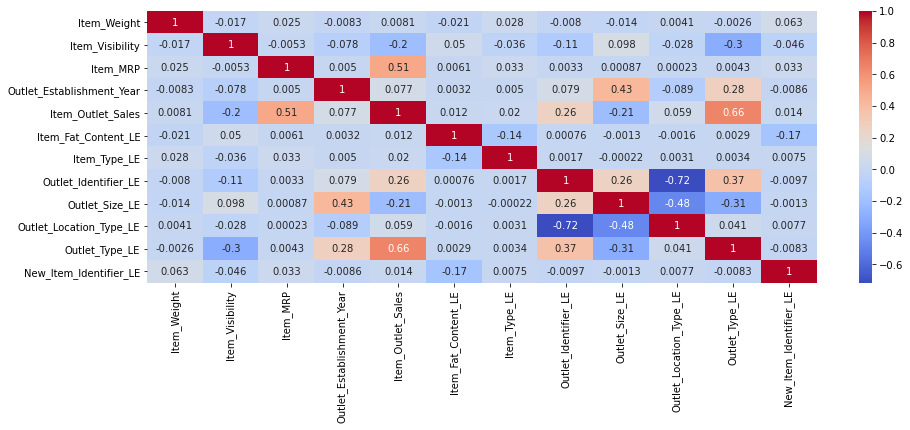

In [654]:
corr = df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Train Test Split

In [655]:
X = df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Identifier_LE',
                'Item_Fat_Content_LE','Item_Type_LE','Outlet_Size_LE','Outlet_Location_Type_LE','Outlet_Type_LE',
                'New_Item_Identifier_LE']]

y = df[['Item_Outlet_Sales']]

In [656]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Identifier_LE,Item_Fat_Content_LE,Item_Type_LE,Outlet_Size_LE,Outlet_Location_Type_LE,Outlet_Type_LE,New_Item_Identifier_LE
0,9.30,0.016047,249.8092,1999,9,0,4,1,0,1,1
1,5.92,0.019278,48.2692,2009,3,1,14,1,2,1,0
2,17.50,0.016760,141.6180,1999,9,0,10,1,0,1,1
3,19.20,0.066132,182.0950,1998,0,1,6,2,2,0,1
4,8.93,0.066132,53.8614,1987,1,0,9,0,2,1,2


In [657]:
y.head()

,Item_Outlet_Sales
0,8.225808
1,6.096776
2,7.648868
3,6.597664
4,6.903451


# Model Training

In [658]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X,y):
    # Train model
    model.fit(X,y)
    
    # Predict the training set
    pred = model.predict(X)
    
    # Perform cross-validation
    cv_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:", mean_squared_error(y,pred))
    print("CV Score:",cv_score)

In [659]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)

Model Report
MSE: 0.2994829010051105
CV Score: 0.30022353989949496


<AxesSubplot:title={'center':'Model Coefficients'}>

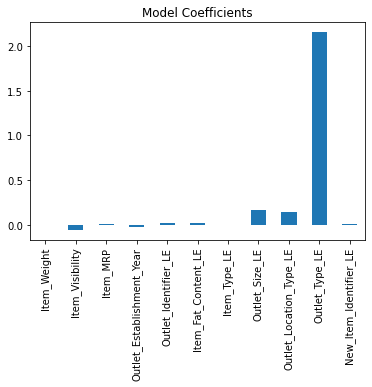

In [660]:
coef = pd.Series(model.coef_[0],X.columns)
coef.plot(kind='bar',title='Model Coefficients')

Model Report
MSE: 0.4748278192554908
CV Score: 0.4755374924753101


<AxesSubplot:title={'center':'Model Coefficients'}>

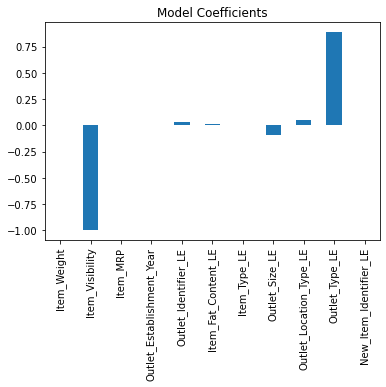

In [661]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_[0],X.columns)
coef.plot(kind='bar',title='Model Coefficients')

Model Report
MSE: 0.7628688679102086
CV Score: 0.7630789166281843


<AxesSubplot:title={'center':'Model Coefficients'}>

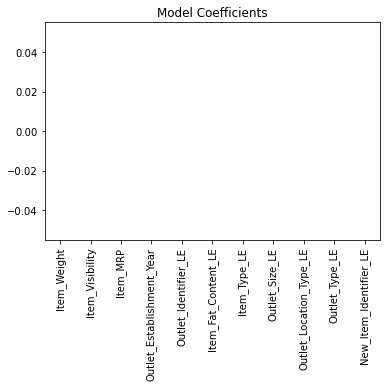

In [662]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_[0],X.columns)
coef.plot(kind='bar',title='Model Coefficients')

Model Report
MSE: 5.5534030638578795e-34
CV Score: 0.571477062654461


<AxesSubplot:title={'center':'Feature Importance'}>

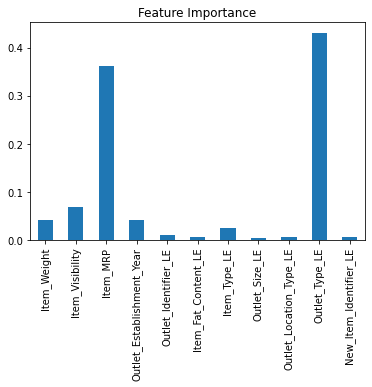

In [663]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_,X.columns)
coef.plot(kind='bar',title='Feature Importance')

Model Report
MSE: 0.042793364891173205
CV Score: 0.3093916935120083


<AxesSubplot:title={'center':'Feature Importance'}>

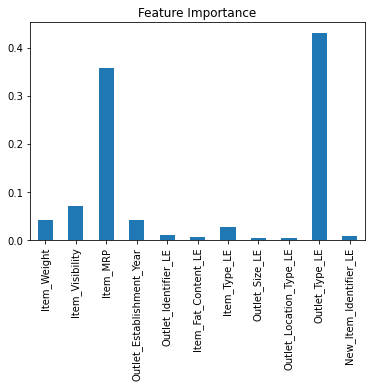

In [664]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_,X.columns)
coef.plot(kind='bar',title='Feature Importance')